In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [212]:
df = pd.read_excel('Craig Silliman Post All Hands Survey (Responses).xlsx')

In [213]:
df
## 710 rows × 4 columns

,Timestamp,What topics would you like to see covered in future All Hands?,"Please provide us with any general comments, feedback, or suggestions.","On a scale of 1 to 5, with 5 being most productive, did you find Craig's All Hands to be a productive use of your time?"
0,2019-09-27 17:05:49.307,.,.,NaN
1,2019-09-27 17:05:49.847,NaN,NaN,NaN
2,2019-09-27 17:06:27.474,NaN,NaN,NaN
3,2019-09-27 17:06:40.400,NaN,NaN,NaN
4,2019-09-27 17:06:44.019,NaN,NaN,NaN
5,2019-09-27 17:06:46.435,NaN,NaN,NaN
6,2019-09-27 17:06:48.583,Future plans for Verizon,NaN,NaN
7,2019-09-27 17:06:51.325,Direction of the company in the coming months.,NaN,NaN
8,2019-09-27 17:06:55.302,"The state of the business, new jobs coming up,...",NaN,NaN
9,2019-09-27 17:07:00.855,NaN,NaN,NaN


In [214]:
# percentage answerd
round(df.isna().sum()/710,2)


Timestamp                                                                                                                  0.00
What topics would you like to see covered in future All Hands?                                                             0.48
Please provide us with any general comments, feedback, or suggestions.                                                     0.52
On a scale of 1 to 5, with 5 being most productive, did you find Craig's All Hands to be a productive use of your time?    0.60
dtype: float64

In [215]:
df.dtypes

Timestamp                                                                                                                  datetime64[ns]
What topics would you like to see covered in future All Hands?                                                                     object
Please provide us with any general comments, feedback, or suggestions.                                                             object
On a scale of 1 to 5, with 5 being most productive, did you find Craig's All Hands to be a productive use of your time?           float64
dtype: object

#### tokenize

In [216]:
# read with out punctuation

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [217]:
df['token_Q1'] = df[df['What topics would you like to see covered in future All Hands?'].notnull()]['What topics would you like to see covered in future All Hands?'].apply(tokenizer.tokenize)
df['token_Q2'] = df[df['Please provide us with any general comments, feedback, or suggestions.'].notnull()]['Please provide us with any general comments, feedback, or suggestions.'].apply(tokenizer.tokenize)

In [218]:
df['len_Q1'] = df[df['What topics would you like to see covered in future All Hands?'].notnull()]['token_Q1'].apply(len)
df['len_Q2'] = df[df['Please provide us with any general comments, feedback, or suggestions.'].notnull()]['token_Q2'].apply(len)

In [219]:
df['len_Q1'] = df['len_Q1'].fillna(0)
df['len_Q2'] = df['len_Q2'].fillna(0)

In [220]:
df

,Timestamp,What topics would you like to see covered in future All Hands?,"Please provide us with any general comments, feedback, or suggestions.","On a scale of 1 to 5, with 5 being most productive, did you find Craig's All Hands to be a productive use of your time?",token_Q1,token_Q2,len_Q1,len_Q2
0,2019-09-27 17:05:49.307,.,.,NaN,[],[],0.0,0.0
1,2019-09-27 17:05:49.847,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019-09-27 17:06:27.474,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2019-09-27 17:06:40.400,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2019-09-27 17:06:44.019,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,2019-09-27 17:06:46.435,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,2019-09-27 17:06:48.583,Future plans for Verizon,NaN,NaN,"[Future, plans, for, Verizon]",NaN,4.0,0.0
7,2019-09-27 17:06:51.325,Direction of the company in the coming months.,NaN,NaN,"[Direction, of, the, company, in, the, coming,...",NaN,8.0,0.0
8,2019-09-27 17:06:55.302,"The state of the business, new jobs coming up,...",NaN,NaN,"[The, state, of, the, business, new, jobs, com...",NaN,14.0,0.0
9,2019-09-27 17:07:00.855,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [298]:
df[(df['len_Q2'] > 10) & (df['len_Q2'] <= 40)]['len_Q2'].count()/340

0.4823529411764706

In [297]:
df[(df['len_Q1'] > 40)]['len_Q1'].count()/368

0.03260869565217391

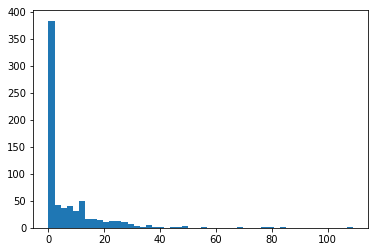

In [221]:
plt.hist(df['len_Q1'],bins = 50)
plt.show()

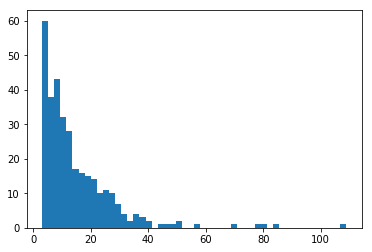

In [222]:
plt.hist(df[df.len_Q1 >= 3]['len_Q1'] ,bins = 50)
plt.show()

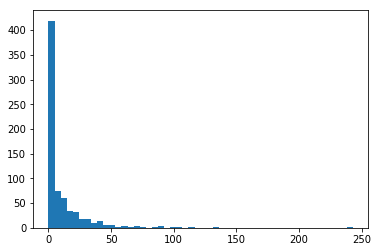

In [223]:
plt.hist(df['len_Q2'],bins = 50)
plt.show()

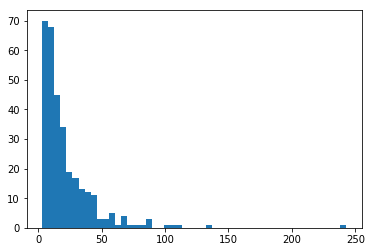

In [224]:
plt.hist(df[df['len_Q2'] >= 3]['len_Q2'] ,bins = 50)
plt.show()

In [225]:
df['len_Q3'] = df.iloc[:,3].fillna(0)

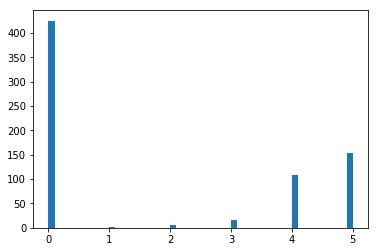

In [226]:
plt.hist(df['len_Q3'],bins = 50)
plt.show()

In [227]:
df.groupby(['len_Q3'])['Timestamp'].count()

len_Q3
0.0    425
1.0      1
2.0      5
3.0     17
4.0    109
5.0    153
Name: Timestamp, dtype: int64

In [299]:
df.groupby(['len_Q3'])['Timestamp'].count()/(710-425)

len_Q3
0.0    1.491228
1.0    0.003509
2.0    0.017544
3.0    0.059649
4.0    0.382456
5.0    0.536842
Name: Timestamp, dtype: float64

In [229]:
df[df['len_Q3'] >0].groupby(['len_Q3'])['Timestamp'].count()/df[df['len_Q3'] >0]['Timestamp'].count()

len_Q3
1.0    0.003509
2.0    0.017544
3.0    0.059649
4.0    0.382456
5.0    0.536842
Name: Timestamp, dtype: float64

In [230]:
df[df['len_Q3'] >0].groupby(['len_Q3'])['len_Q2','len_Q1'].mean()

,len_Q2,len_Q1
len_Q3,,
1.0,88.000000,26.000000
2.0,8.400000,21.800000
3.0,4.529412,7.235294
4.0,6.623853,4.330275
5.0,8.267974,5.797386


In [231]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yangsh6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### remove stopwords, & Stemming

In [232]:
list_Q1 = [x for x in df.token_Q1 if x == x]
list_Q1 = [item for sublist in list_Q1 for item in sublist]

list_Q2 = [x for x in df.token_Q2 if x == x]
list_Q2 = [item for sublist in list_Q2 for item in sublist]

In [233]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

filtered_Q1=[]
filtered_Q2=[]

stop_words=set(stopwords.words("english"))
ps = PorterStemmer()


for w in list_Q1:
    if w not in stop_words:
        filtered_Q1.append(ps.stem(w))
        
for w in list_Q2:
    if w not in stop_words:
        filtered_Q2.append(ps.stem(w))        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangsh6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### get the frequnecy

In [301]:
pd.DataFrame(list(nltk.FreqDist(filtered_Q1).items()), columns = ["Word","Frequency"]).sort_values(['Frequency'], ascending = False)[:10]

,Word,Frequency
2,verizon,55
108,I,41
13,2,39
94,updat,35
14,0,32
246,team,31
89,legal,30
42,would,30
43,like,28
4,compani,26


In [303]:
pd.DataFrame(list(nltk.FreqDist(filtered_Q2).items()), columns = ["Word","Frequency"]).sort_values(['Frequency'], ascending = False)[:50]

,Word,Frequency
0,I,152
2,craig,91
18,great,77
4,inform,62
8,meet,62
3,hand,47
34,It,46
17,time,45
19,hear,38
15,good,38


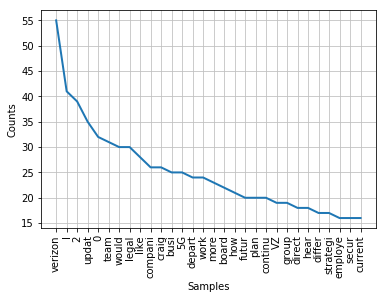

In [236]:
nltk.FreqDist(filtered_Q1).plot(30,cumulative=False)
plt.show()

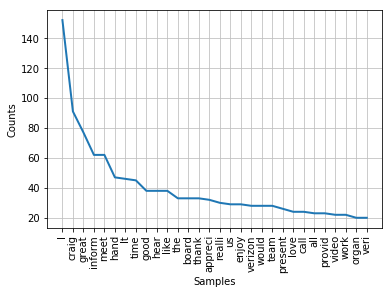

In [237]:
nltk.FreqDist(filtered_Q2).plot(30,cumulative=False)
plt.show()

#### sentiment

In [238]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

In [239]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yangsh6\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [240]:
sia = SIA()
results = []

In [241]:
pol_score['compound']

0.9766

In [242]:
for comment in df[df['Please provide us with any general comments, feedback, or suggestions.'].notnull()]['Please provide us with any general comments, feedback, or suggestions.']:
    pol_score = sia.polarity_scores(comment)
    pol_score['headline'] = comment
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0, 'headline': '.', 'neg': 0.0, 'neu': 0.0, 'pos': 0.0},
 {'compound': 0.3321,
  'headline': "I feel Craig's on Hands are very informative and well presented",
  'neg': 0.0,
  'neu': 0.792,
  'pos': 0.208},
 {'compound': 0.6361,
  'headline': 'The meeting well was organized and very helpful to me, especially as a recent hire.',
  'neg': 0.0,
  'neu': 0.698,
  'pos': 0.302}]


In [243]:
results

[{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'headline': '.'},
 {'neg': 0.0,
  'neu': 0.792,
  'pos': 0.208,
  'compound': 0.3321,
  'headline': "I feel Craig's on Hands are very informative and well presented"},
 {'neg': 0.0,
  'neu': 0.698,
  'pos': 0.302,
  'compound': 0.6361,
  'headline': 'The meeting well was organized and very helpful to me, especially as a recent hire.'},
 {'neg': 0.0,
  'neu': 0.641,
  'pos': 0.359,
  'compound': 0.807,
  'headline': "Very good use of our time, it was great hearing Verizon's culture in Craig's words. "},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'headline': "listing names of all groups wasn't necessary"},
 {'neg': 0.0,
  'neu': 0.4,
  'pos': 0.6,
  'compound': 0.6696,
  'headline': 'The best all hands! '},
 {'neg': 0.0,
  'neu': 0.723,
  'pos': 0.277,
  'compound': 0.5574,
  'headline': 'I liked that Craig educated the crowd on some important topics and was very transparent.   '},
 {'neg': 0.085,
  'neu': 0.697,


In [247]:
df['sent_Q1'] = df[df['What topics would you like to see covered in future All Hands?'].notnull()]['What topics would you like to see covered in future All Hands?'].apply(sia.polarity_scores)
df['sent_Q2'] = df[df['Please provide us with any general comments, feedback, or suggestions.'].notnull()]['Please provide us with any general comments, feedback, or suggestions.'].apply(sia.polarity_scores)

In [248]:
df

,Timestamp,What topics would you like to see covered in future All Hands?,"Please provide us with any general comments, feedback, or suggestions.","On a scale of 1 to 5, with 5 being most productive, did you find Craig's All Hands to be a productive use of your time?",token_Q1,token_Q2,len_Q1,len_Q2,len_Q3,sent_Q1,sent_Q2
0,2019-09-27 17:05:49.307,.,.,NaN,[],[],0.0,0.0,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
1,2019-09-27 17:05:49.847,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
2,2019-09-27 17:06:27.474,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3,2019-09-27 17:06:40.400,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
4,2019-09-27 17:06:44.019,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
5,2019-09-27 17:06:46.435,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
6,2019-09-27 17:06:48.583,Future plans for Verizon,NaN,NaN,"[Future, plans, for, Verizon]",NaN,4.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN
7,2019-09-27 17:06:51.325,Direction of the company in the coming months.,NaN,NaN,"[Direction, of, the, company, in, the, coming,...",NaN,8.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN
8,2019-09-27 17:06:55.302,"The state of the business, new jobs coming up,...",NaN,NaN,"[The, state, of, the, business, new, jobs, com...",NaN,14.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN
9,2019-09-27 17:07:00.855,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [254]:
df['sent_Q1_pos'] = 'NaN'
df['sent_Q1_neg'] = 'NaN'
df['sent_Q1_neu'] = 'NaN'
df['sent_Q1_com'] = 'NaN'

df['sent_Q2_pos'] = 'NaN'
df['sent_Q2_neg'] = 'NaN'
df['sent_Q2_neu'] = 'NaN'
df['sent_Q2_com'] = 'NaN'

In [255]:
df.loc[df['sent_Q1'].notnull(),'sent_Q1_pos'] = [d['pos'] for d in df[df['sent_Q1'].notnull()]['sent_Q1']]
df.loc[df['sent_Q1'].notnull(),'sent_Q1_neg'] = [d['neg'] for d in df[df['sent_Q1'].notnull()]['sent_Q1']]
df.loc[df['sent_Q1'].notnull(),'sent_Q1_neu'] = [d['neu'] for d in df[df['sent_Q1'].notnull()]['sent_Q1']]
df.loc[df['sent_Q1'].notnull(),'sent_Q1_com'] = [d['compound'] for d in df[df['sent_Q1'].notnull()]['sent_Q1']]

df.loc[df['sent_Q2'].notnull(),'sent_Q2_pos'] = [d['pos'] for d in df[df['sent_Q2'].notnull()]['sent_Q2']]
df.loc[df['sent_Q2'].notnull(),'sent_Q2_neg'] = [d['neg'] for d in df[df['sent_Q2'].notnull()]['sent_Q2']]
df.loc[df['sent_Q2'].notnull(),'sent_Q2_neu'] = [d['neu'] for d in df[df['sent_Q2'].notnull()]['sent_Q2']]
df.loc[df['sent_Q2'].notnull(),'sent_Q2_com'] = [d['compound'] for d in df[df['sent_Q2'].notnull()]['sent_Q2']]


In [256]:
df

,Timestamp,What topics would you like to see covered in future All Hands?,"Please provide us with any general comments, feedback, or suggestions.","On a scale of 1 to 5, with 5 being most productive, did you find Craig's All Hands to be a productive use of your time?",token_Q1,token_Q2,len_Q1,len_Q2,len_Q3,sent_Q1,sent_Q2,sent_Q1_pos,sent_Q1_neg,sent_Q1_neu,sent_Q1_com,sent_Q2_pos,sent_Q2_neg,sent_Q2_neu,sent_Q2_com
0,2019-09-27 17:05:49.307,.,.,NaN,[],[],0.0,0.0,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0,0,0,0,0,0,0,0
1,2019-09-27 17:05:49.847,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-27 17:06:27.474,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-27 17:06:40.400,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-27 17:06:44.019,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-09-27 17:06:46.435,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-09-27 17:06:48.583,Future plans for Verizon,NaN,NaN,"[Future, plans, for, Verizon]",NaN,4.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,0,0,1,0,NaN,NaN,NaN,NaN
7,2019-09-27 17:06:51.325,Direction of the company in the coming months.,NaN,NaN,"[Direction, of, the, company, in, the, coming,...",NaN,8.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,0,0,1,0,NaN,NaN,NaN,NaN
8,2019-09-27 17:06:55.302,"The state of the business, new jobs coming up,...",NaN,NaN,"[The, state, of, the, business, new, jobs, com...",NaN,14.0,0.0,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",NaN,0,0,1,0,NaN,NaN,NaN,NaN
9,2019-09-27 17:07:00.855,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df.loc[df['sent_Q2'].notnull(),['sent_Q2_pos','sent_Q2_neg','sent_Q2_neu','sent_Q2_com']].mean()

sent_Q2_pos    0.300158
sent_Q2_neg    0.012372
sent_Q2_neu    0.684543
sent_Q2_com    0.535282
dtype: float64

In [262]:
df.loc[df['sent_Q1'].notnull(),['sent_Q1_pos','sent_Q1_neg','sent_Q1_neu','sent_Q1_com']].mean()

sent_Q1_pos    0.140602
sent_Q1_neg    0.017843
sent_Q1_neu    0.838840
sent_Q1_com    0.219287
dtype: float64